## Task 2: Unsupervised Machine Learning ## -- Akhand Shishodia
**In this task we will be exploring the Iris Dataset and we will be finding the optimum number of clusters and represent it visually**

**1. Importing Libraries**

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from sklearn import datasets 
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


**2. Loading Dataset**


In [33]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data,columns = iris.feature_names)

**3. Exploring Dataset**

In [34]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


**4. Modeling** --
We need to find the optimum number of clusters for clustering the dataset and we will use the Elbow Method to find the optimum number of clusters.

**The Elbow Method** - Calculate the Within-Cluster-Sum of Squared Errors (WSS) for different values of k and choose the k for which WSS becomes first start to diminish. In the plot of WSS-versus-k, this is visible as an elbow.

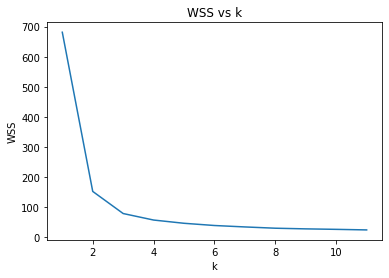

In [36]:
wss = []
k = [x for x in range(1,12)]
for i in k:
    kmeans = KMeans(n_clusters = i , init = 'k-means++').fit(data)
    wss.append(kmeans.inertia_)
plt.plot(k,wss)
plt.xlabel('k')
plt.ylabel('WSS')
plt.title('WSS vs k')
plt.show()

Clearly, we can see from plot that there is a bend near k = 3. So, we consider 3 clusters.

**5. Predicting using model**

In [37]:
km = KMeans(n_clusters = 3, random_state = 5)
km.fit(data)
clusters = km.labels_
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [38]:
data['Cluster'] = clusters
data.head(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


**6. Visualising Clusters**


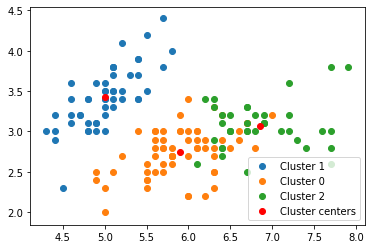

In [39]:
c1 = data[data['Cluster']==1]
c0 = data[data['Cluster']==0]
c2 = data[data['Cluster']==2]

plt.scatter(c1['sepal length (cm)'],c1['sepal width (cm)'],label = "Cluster 1 ")
plt.scatter(c0['sepal length (cm)'],c0['sepal width (cm)'],label = "Cluster 0 ")
plt.scatter(c2['sepal length (cm)'],c2['sepal width (cm)'],label = "Cluster 2 ")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'Red',label ="Cluster centers")
plt.legend()
plt.show()
